### Importing All the libraries necessary for Data reading,processing , Cleaning ,modelling.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Importing train,test,splits for model  for Data reading,processing , Cleaning ,modelling.

In [2]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [3]:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures

### Importing Housing Dataset 

In [4]:
df=pd.read_csv("train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Checking all the Information about the Variables using .info Function  

In [5]:
information =df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Analysing the descriptive statistics of the Dataset

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### As the dataset is ready , lets find out the correlation between each variables 

In [7]:
correlation_matrix =df.corr()

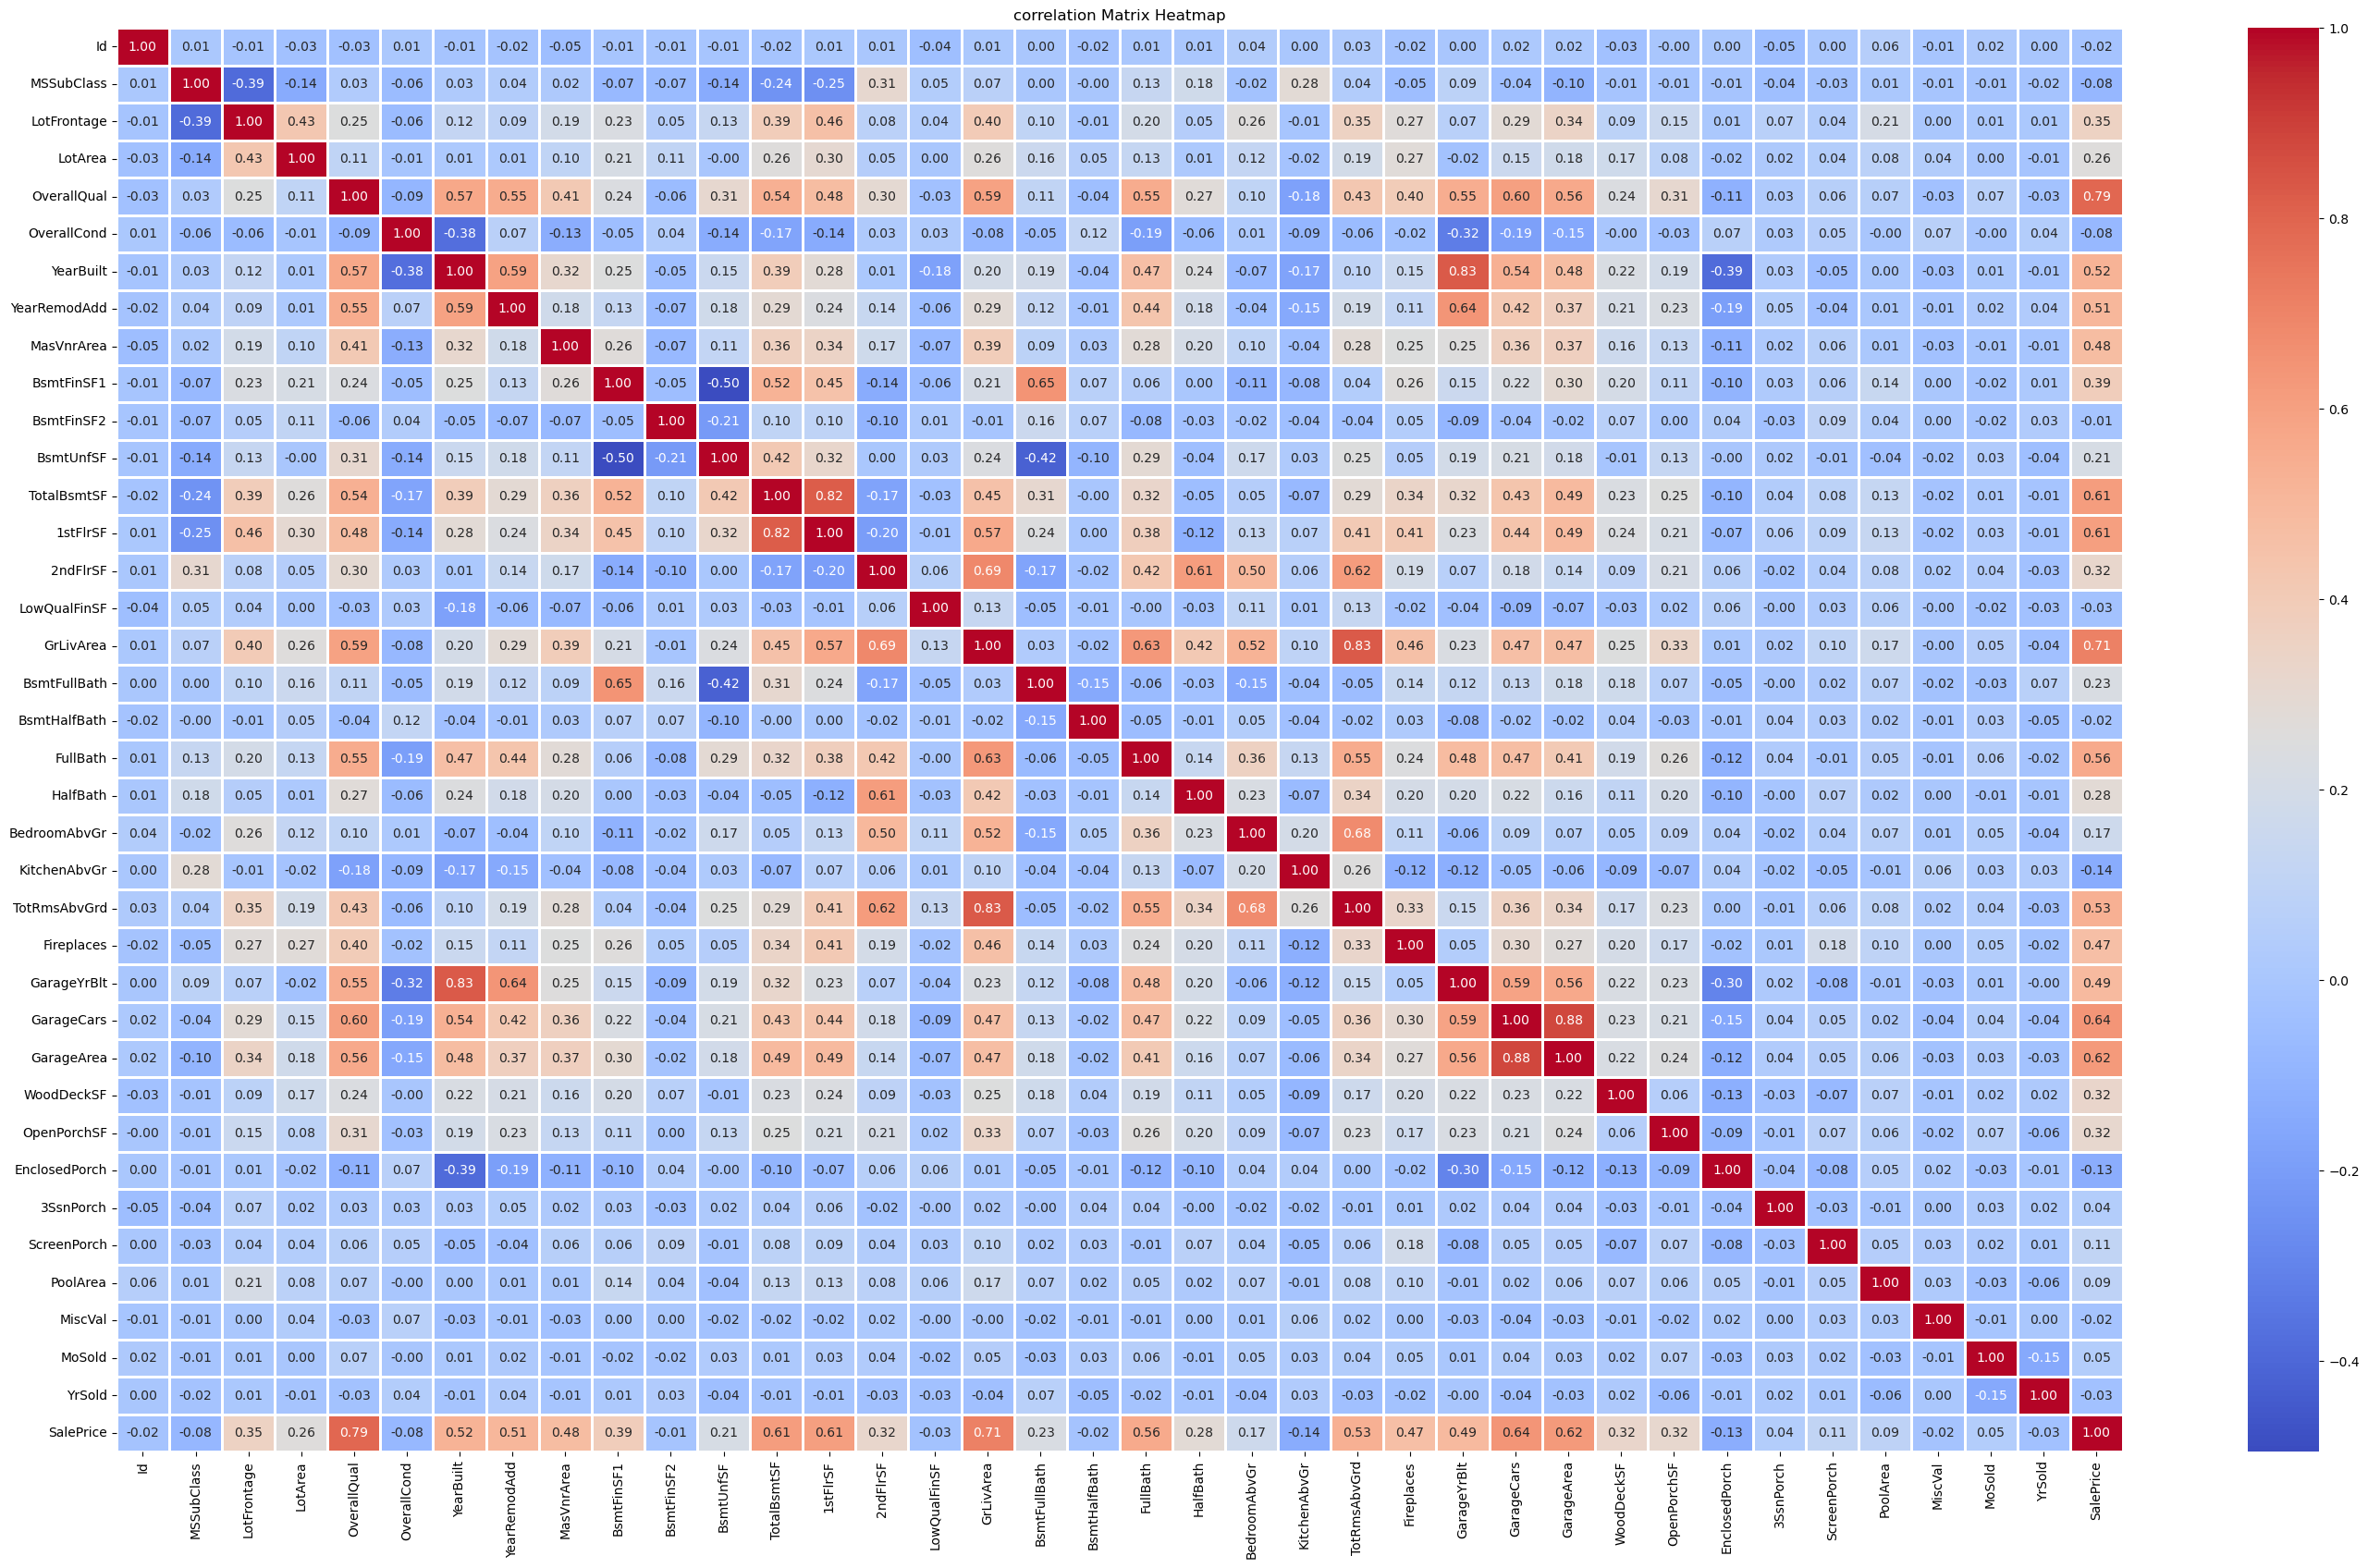

In [8]:
plt.figure(figsize=(35,20))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",linewidth=2,linecolor="white",fmt=".2f")
plt.title("correlation Matrix Heatmap")
plt.savefig("correlation_matrix_heatmap.png")
plt.show()

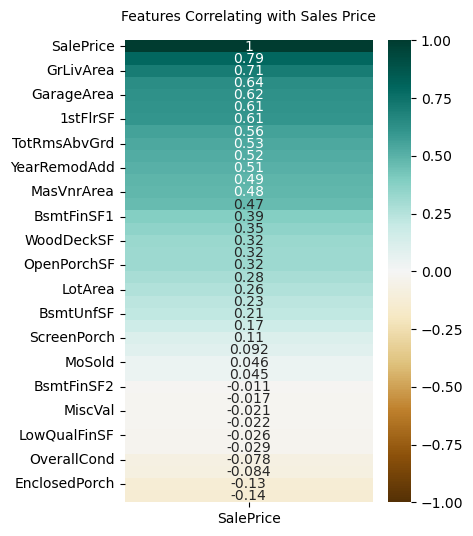

In [9]:
plt.figure(figsize=(4, 6))
heatmap = sns.heatmap(df.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':10}, pad=14)
plt.savefig("Features Correlating with Sales Price2.png")

### selected numerical features which have more than 0.50 or less than -0.50 correlation rate

In [10]:
important_numerical_columns = list(df.corr()['SalePrice'][(df.corr()['SalePrice']> 0.50)|(df.corr()['SalePrice']< -0.50)].index) 
cat_cols = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]
important_columns = important_numerical_columns + cat_cols

In [11]:
important_numerical_columns

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

In [12]:
df1 = df[important_columns]

In [13]:
df1.describe()


,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1971.267808,1984.865753,1057.429452,1162.626712,1515.463699,1.565068,6.517808,1.767123,472.980137,180921.195890
std,1.382997,30.202904,20.645407,438.705324,386.587738,525.480383,0.550916,1.625393,0.747315,213.804841,79442.502883
min,1.000000,1872.000000,1950.000000,0.000000,334.000000,334.000000,0.000000,2.000000,0.000000,0.000000,34900.000000
25%,5.000000,1954.000000,1967.000000,795.750000,882.000000,1129.500000,1.000000,5.000000,1.000000,334.500000,129975.000000
50%,6.000000,1973.000000,1994.000000,991.500000,1087.000000,1464.000000,2.000000,6.000000,2.000000,480.000000,163000.000000
75%,7.000000,2000.000000,2004.000000,1298.250000,1391.250000,1776.750000,2.000000,7.000000,2.000000,576.000000,214000.000000
max,10.000000,2010.000000,2010.000000,6110.000000,4692.000000,5642.000000,3.000000,14.000000,4.000000,1418.000000,755000.000000


## DATA VISUALISATION 

### Joint plots were also utilized to discover additional patterns

<Figure size 1000x800 with 0 Axes>

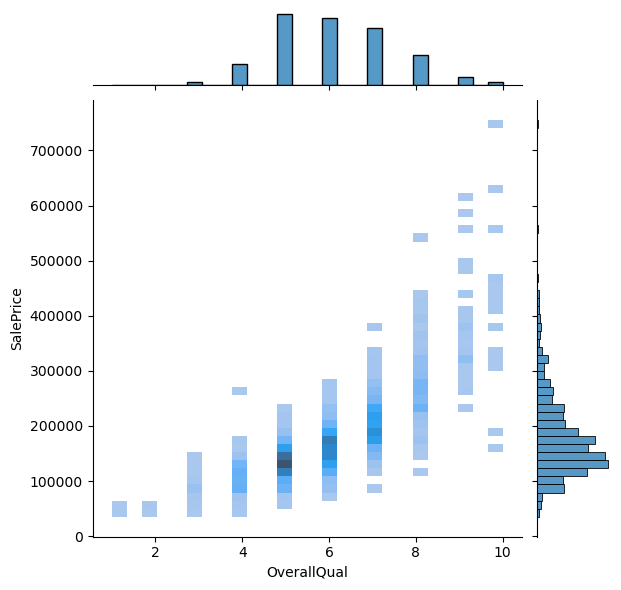

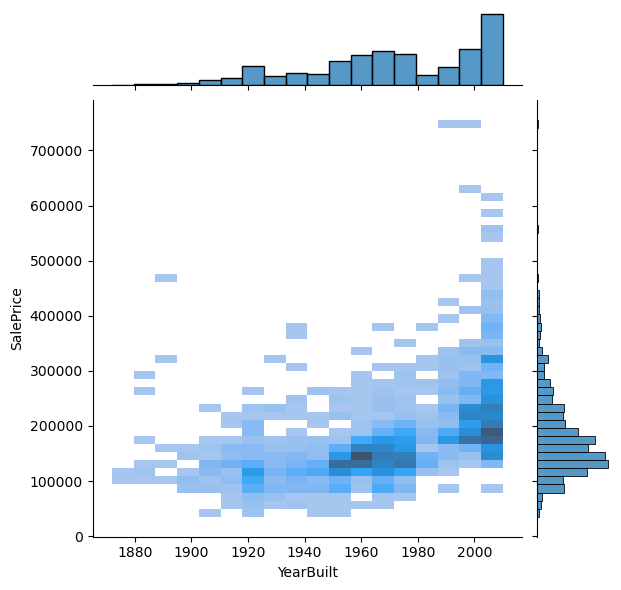

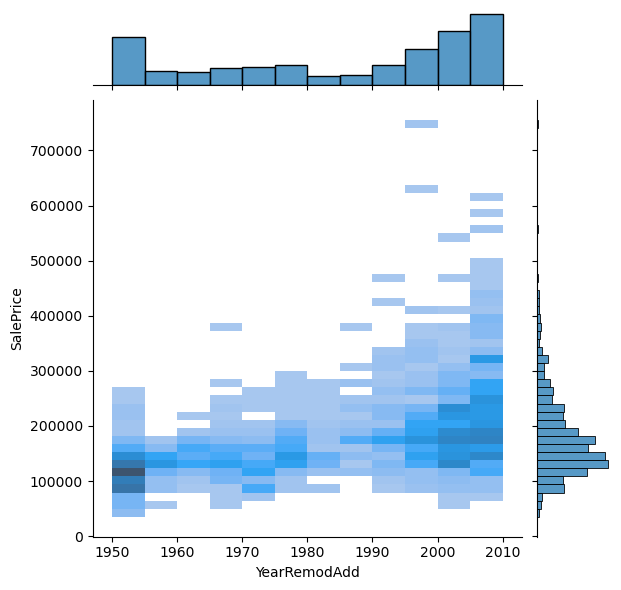

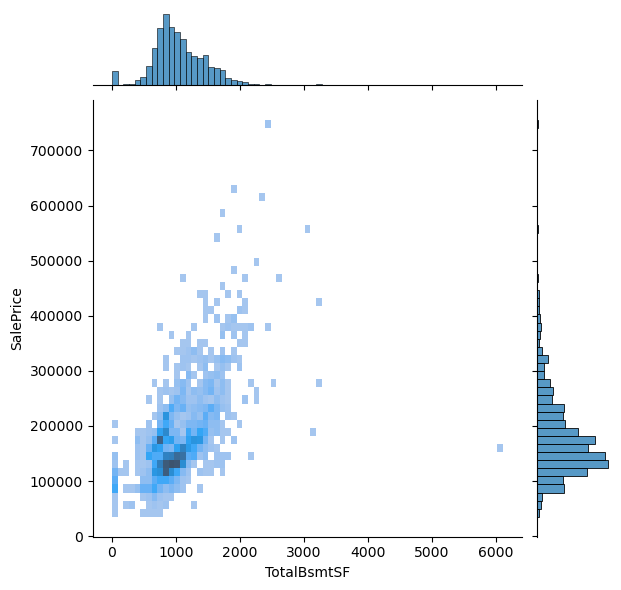

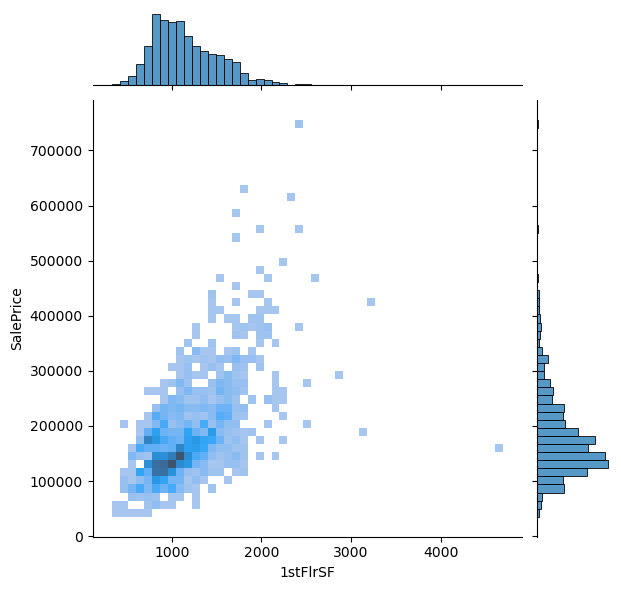

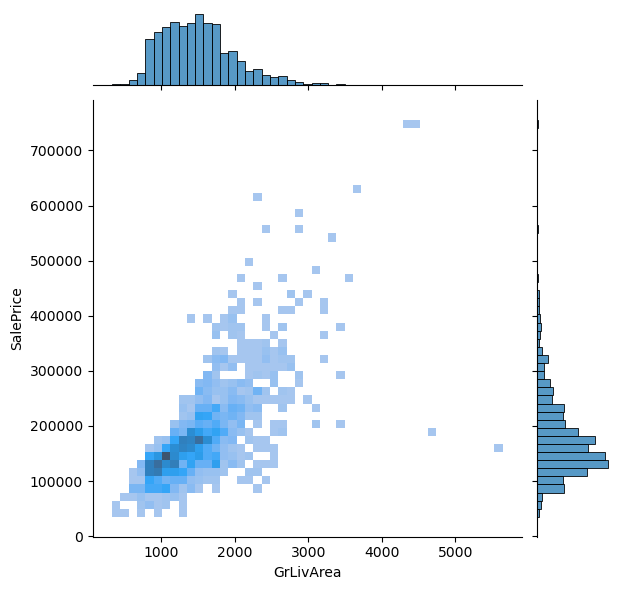

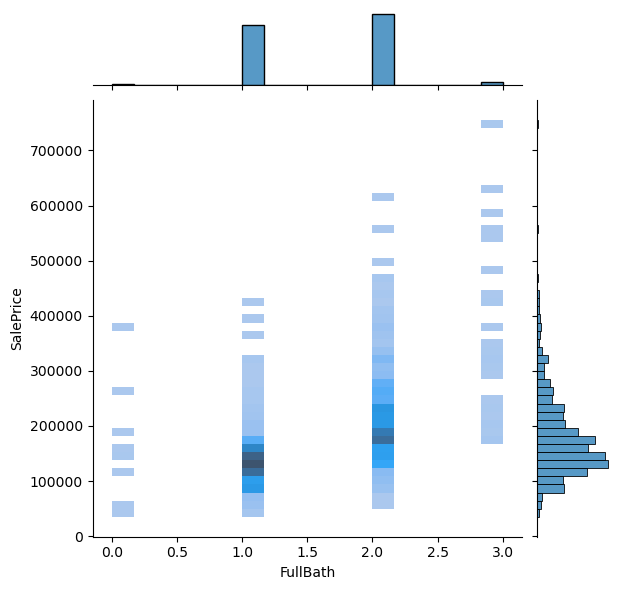

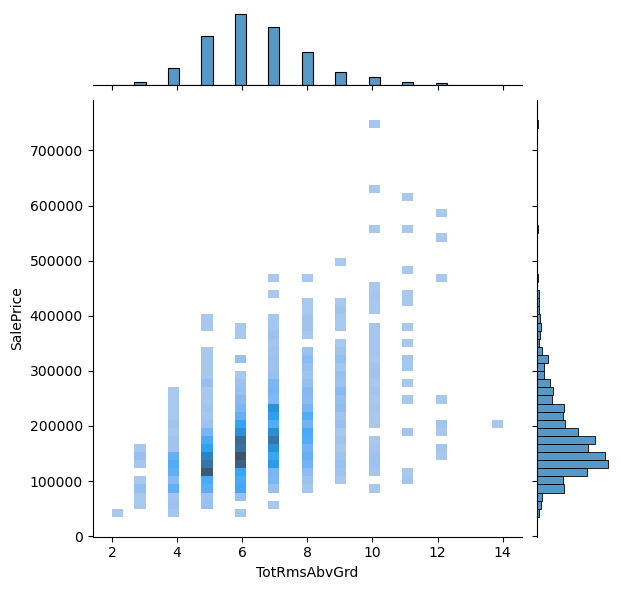

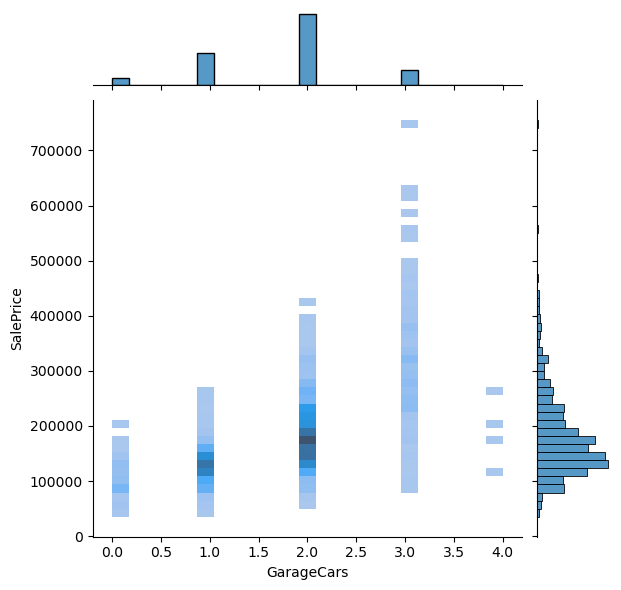

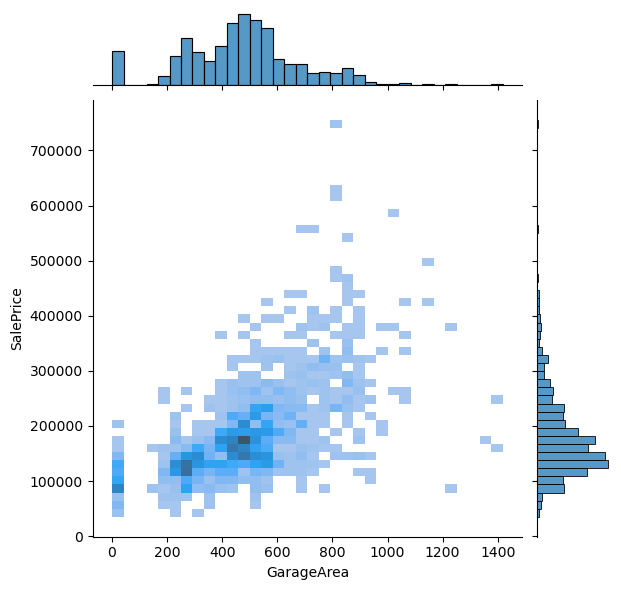

In [14]:
plt.figure(figsize=(10,8))
sns.jointplot(x=df["OverallQual"], y=df["SalePrice"], kind="hist")
sns.jointplot(x=df["YearBuilt"], y=df["SalePrice"], kind="hist")
sns.jointplot(x=df["YearRemodAdd"], y=df["SalePrice"], kind="hist")
sns.jointplot(x=df["TotalBsmtSF"], y=df["SalePrice"], kind="hist")
sns.jointplot(x=df["1stFlrSF"], y=df["SalePrice"], kind="hist")
sns.jointplot(x=df["GrLivArea"], y=df["SalePrice"], kind="hist")
sns.jointplot(x=df["FullBath"], y=df["SalePrice"], kind="hist")
sns.jointplot(x=df["TotRmsAbvGrd"], y=df["SalePrice"], kind="hist")
sns.jointplot(x=df["GarageCars"], y=df["SalePrice"], kind="hist")
sns.jointplot(x=df["GarageArea"], y=df["SalePrice"], kind="hist")
plt.show()

### Splitting the data into X and y ( Variables)

In [15]:
X = df1.drop('SalePrice',axis = 1)
y = df1['SalePrice']


### One Hot Encoding Categorical Variables 

In [16]:
X = pd.get_dummies(X, columns=cat_cols)

In [16]:
X

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,7,2003,2003,856,856,1710,2,8,2,548,...,0,0,0,0,0,1,0,1,0,0
1,6,1976,1976,1262,1262,1262,2,6,2,460,...,1,0,0,0,0,1,0,1,0,0
2,7,2001,2002,920,920,1786,2,6,2,608,...,0,0,0,0,0,1,0,1,0,0
3,7,1915,1970,756,961,1717,1,7,3,642,...,0,1,0,0,0,0,0,1,0,0
4,8,2000,2000,1145,1145,2198,2,9,3,836,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,...,1,0,0,0,0,1,0,1,0,0
1456,6,1978,1988,1542,2073,2073,2,7,2,500,...,1,0,0,0,0,1,0,1,0,0
1457,7,1941,2006,1152,1188,2340,2,9,1,252,...,0,0,0,0,0,1,0,1,0,0
1458,5,1950,1996,1078,1078,1078,1,5,1,240,...,0,0,0,0,0,1,0,1,0,0


### Standardization

In [17]:
important_numerical_columns.remove("SalePrice") 
## Remove the Saleprice from Important_num_cols

scaler = StandardScaler()
X[important_numerical_columns] = scaler.fit_transform(X[important_numerical_columns])

## Train Test Split 

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=14)

In [19]:
X_train

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
980,0.651479,-0.340077,1.072482,-0.258644,-0.423404,-0.983178,-1.026041,-0.318683,0.311725,0.538151,...,0,0,0,0,0,1,0,1,0,0
993,-0.071836,1.117235,1.024029,-0.701005,-1.067722,-0.029438,0.789741,-0.318683,0.311725,0.425861,...,0,0,0,0,0,0,1,1,0,0
223,-1.518467,-0.008870,-0.671845,-0.441061,-0.772733,-1.240174,-1.026041,-1.549576,0.311725,0.482006,...,1,1,0,0,0,0,0,1,0,0
1067,-0.071836,-0.240715,-1.011019,-0.632599,-0.943516,0.181870,-1.026041,0.296763,0.311725,-0.144949,...,1,0,0,0,0,1,0,0,1,0
1138,-0.071836,0.189854,-0.381123,1.161931,1.046365,0.098108,0.789741,-0.934130,0.311725,1.127675,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,-0.071836,-0.373198,-1.204833,0.742371,0.570243,-0.252168,-1.026041,0.296763,-1.026858,-0.846764,...,1,0,0,0,0,1,0,1,0,0
406,-0.071836,-1.168096,-1.689368,0.014982,0.008729,0.235173,-1.026041,-0.318683,-1.026858,-1.090059,...,1,0,0,0,0,1,0,1,0,0
1292,-0.795151,-2.625409,-0.962566,-0.144633,0.557304,1.630565,0.789741,2.758549,-1.026858,-0.191736,...,1,0,0,0,0,1,0,1,0,0
1368,-0.071836,1.050994,0.927122,-0.477544,-0.814135,-1.270632,-1.026041,-1.549576,0.311725,-0.247882,...,0,0,0,0,0,1,0,1,0,0


### Defining MAE, MSE , RMSE, R-Squared to apply for all Models

In [20]:
def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

## Making New Row [For prediction and Evaluation ]

In [21]:
ML_models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score",])


## Machine Learning Models ( Regression)

In [22]:
Lin_reg = LinearRegression()
Lin_reg.fit(X_train,y_train)
predictions = Lin_reg.predict(X_test)


mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
ML_models  = ML_models .append(new_row, ignore_index=True)

MAE: 20591.03299867752
MSE: 998689221.0542367
RMSE: 31602.044570790615
R2 Score: 0.8170104695058537
------------------------------


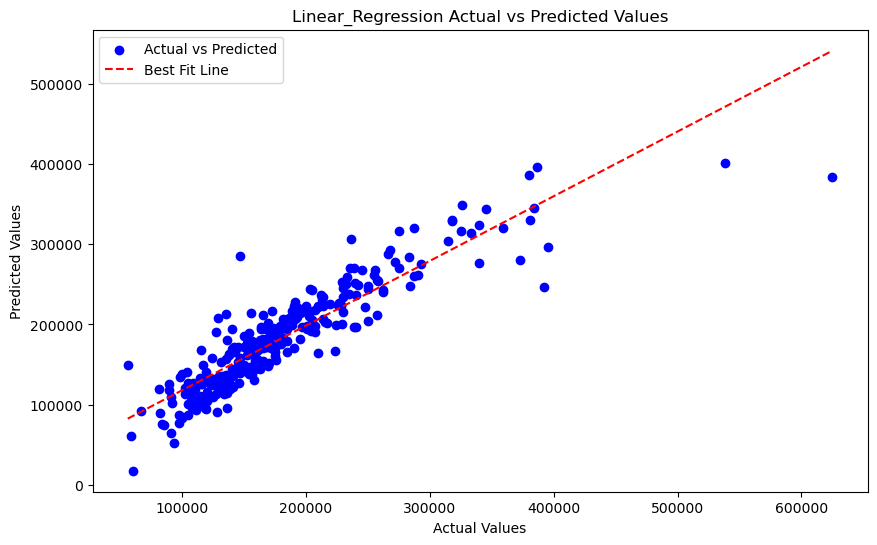

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', label='Actual vs Predicted')
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, predictions, 1))(np.unique(y_test)), color='red', linestyle='--', label='Best Fit Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear_Regression Actual vs Predicted Values')
plt.legend()
plt.show()


In [24]:
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions1 = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions1)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
ML_models = ML_models .append(new_row, ignore_index=True)


MAE: 20585.31211144042
MSE: 998237196.7890341
RMSE: 31594.891941404614
R2 Score: 0.8170932937782275
------------------------------


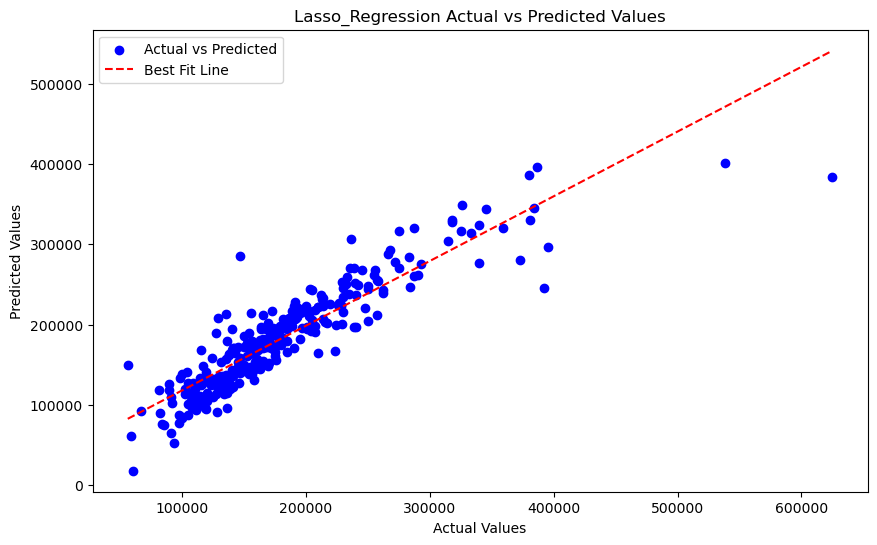

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions1, color='blue', label='Actual vs Predicted')
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, predictions1, 1))(np.unique(y_test)), color='red', linestyle='--', label='Best Fit Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso_Regression Actual vs Predicted Values')
plt.legend()
plt.show()


In [26]:
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions2 = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
ML_models  = ML_models .append(new_row, ignore_index=True)

MAE: 20552.386254021854
MSE: 996039785.4018354
RMSE: 31560.09799417352
R2 Score: 0.8174959248165614
------------------------------


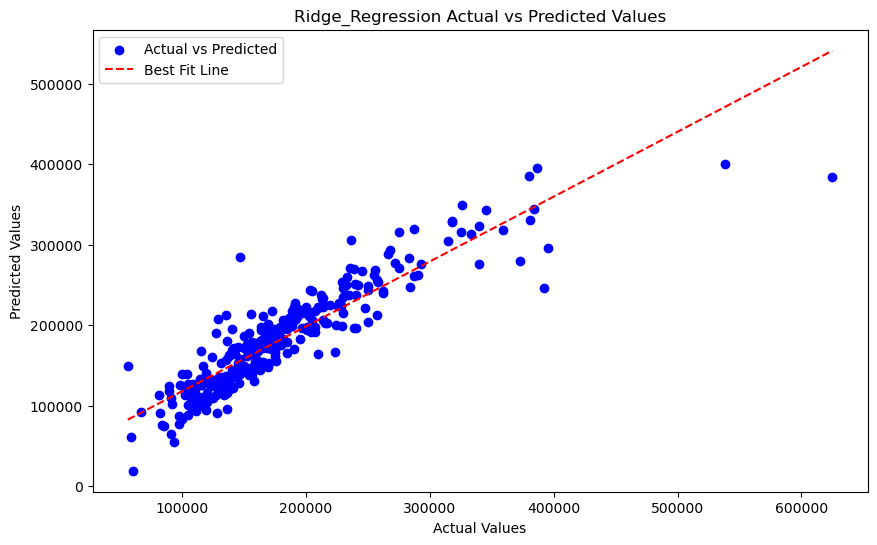

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions2, color='blue', label='Actual vs Predicted')
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, predictions2, 1))(np.unique(y_test)), color='red', linestyle='--', label='Best Fit Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge_Regression Actual vs Predicted Values')
plt.legend()
plt.show()


In [28]:
svr = SVR(C=100000)
svr.fit(X_train, y_train)
predictions4 = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions4)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
ML_models  = ML_models .append(new_row, ignore_index=True)

MAE: 17602.73881090954
MSE: 827046572.7006811
RMSE: 28758.41742343763
R2 Score: 0.848460501180205
------------------------------


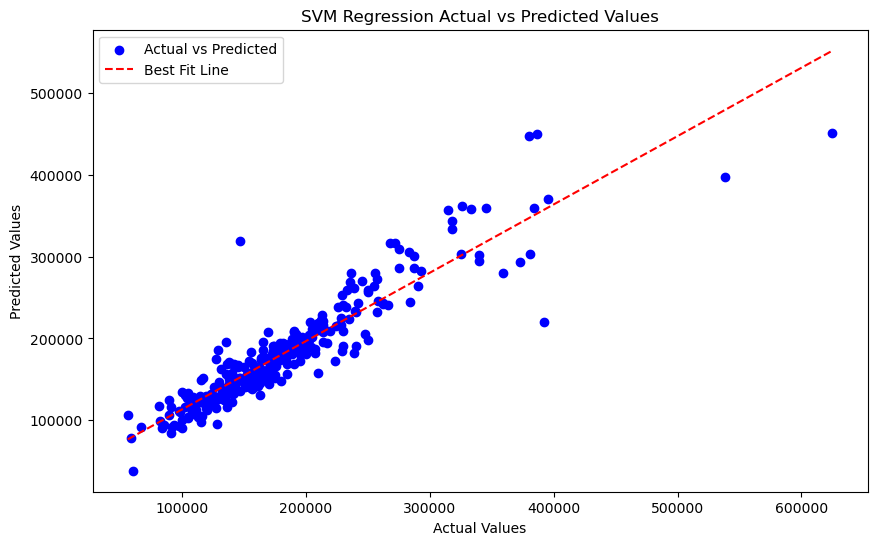

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions4, color='blue', label='Actual vs Predicted')
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, predictions4, 1))(np.unique(y_test)), color='red', linestyle='--', label='Best Fit Line')
plt.xlabel('Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVM Regression Actual vs Predicted Values')
plt.legend()
plt.show()


In [30]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions5 = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions5)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
ML_models= ML_models.append(new_row, ignore_index=True)

MAE: 18828.430861872148
MSE: 870271406.0888753
RMSE: 29500.362812834614
R2 Score: 0.8405404277473069
------------------------------


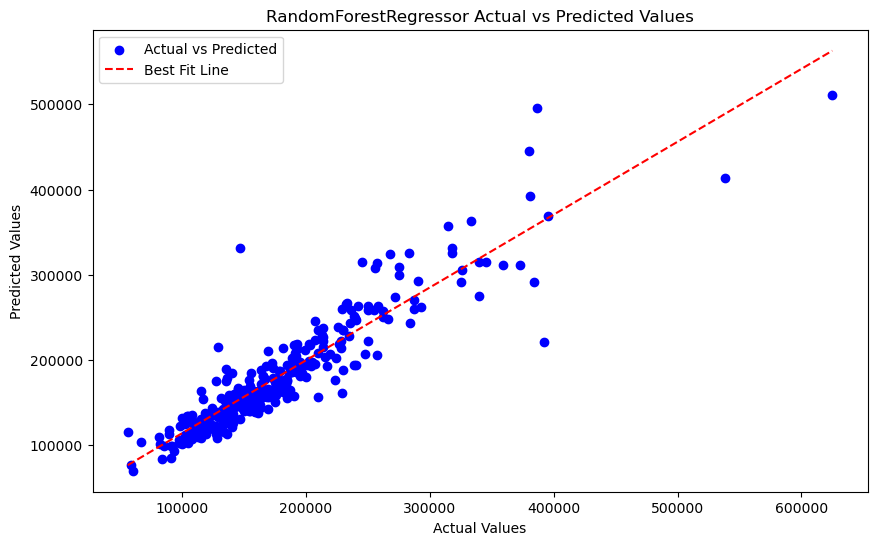

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions5, color='blue', label='Actual vs Predicted')
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, predictions5, 1))(np.unique(y_test)), color='red', linestyle='--', label='Best Fit Line')
plt.xlabel('Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('RandomForestRegressor Actual vs Predicted Values')
plt.legend()
plt.show()


### Evaluation metrics 

In [33]:
ML_models.sort_values(by="RMSE")

,Model,MAE,MSE,RMSE,R2 Score
3,SVR,17602.738811,8.270466e+08,28758.417423,0.848461
4,RandomForestRegressor,18828.430862,8.702714e+08,29500.362813,0.840540
2,Ridge,20552.386254,9.960398e+08,31560.097994,0.817496
1,Lasso,20585.312111,9.982372e+08,31594.891941,0.817093
0,LinearRegression,20591.032999,9.986892e+08,31602.044571,0.817010


### Performance metrics visualisation on RMSE 

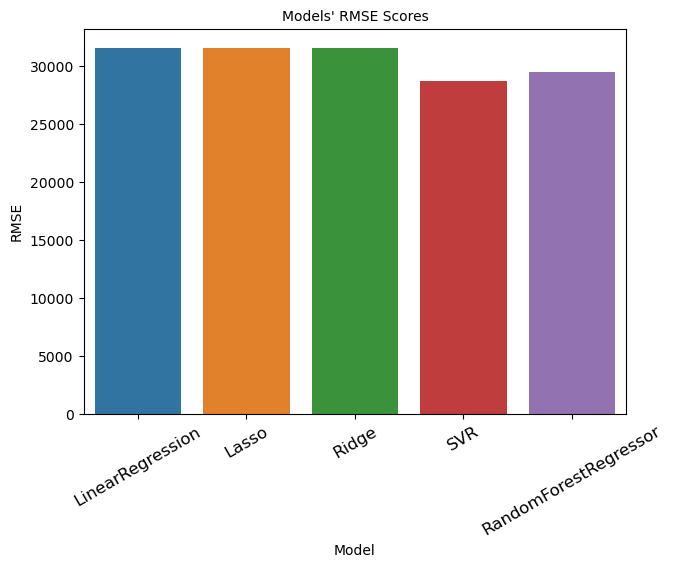

In [34]:
plt.figure(figsize=(7,5))
sns.barplot(x=ML_models["Model"], y=ML_models["RMSE"])
plt.title("Models' RMSE Scores", size=10)
plt.xticks(rotation=30, size=12)
plt.show()